In [1]:
# Import libraries
import pandas as pd
import numpy as np

# Import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Section I: Summary of Data Treatment

In [2]:
# Read in the original dataset for the NSDUH 2021 survey 
# Purpose for importing is to get descriptive statistics on much data was preserved after cleaning
file_path = 'data/NSDUH_2021_Tab.txt'

data = pd.read_csv(file_path, sep='\t')

C:\Users\e.a.wright\AppData\Local\Temp\ipykernel_35804\2939283609.py:5: DtypeWarning: Columns (2792) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, sep='\t')


In [3]:
# Save shape of data
N_rows = data.shape[0]
N_cols = data.shape[1]

# Print shape of data in sentence
print(f"There were {N_rows} rows and {N_cols} columns in the original dataset.")

There were 58034 rows and 2988 columns in the original dataset.


In [4]:
# Read in the pre-process subset of data to be used for modeling
subset = pd.read_csv('data/model_subset.csv')

In [5]:
# Use >= 100 as the cutoff value
cutoff = 100

# Create a new column called 'SMOKER' with the cutoff value
subset['SMOKER'] = np.where(subset['MJYRTOT'] >= cutoff, 1, 0)

In [6]:
# Inspect subset
subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53896 entries, 0 to 53895
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CATAG3      53896 non-null  int64  
 1   HEALTH2     53896 non-null  float64
 2   ANYHLTI2    53896 non-null  int64  
 3   INCOME      53896 non-null  int64  
 4   POVERTY3    53896 non-null  float64
 5   TOBFLAG     53896 non-null  int64  
 6   MRJFLAG     53896 non-null  int64  
 7   PYUD5MRJ    53896 non-null  float64
 8   MJYRTOT     53896 non-null  int64  
 9   ALCFLAG     53896 non-null  int64  
 10  COCFLAG     53896 non-null  int64  
 11  CRKFLAG     53896 non-null  int64  
 12  HERFLAG     53896 non-null  int64  
 13  LSDFLAG     53896 non-null  int64  
 14  METHAMFLAG  53896 non-null  int64  
 15  DEP         53896 non-null  int64  
 16  SMOKER      53896 non-null  int32  
dtypes: float64(3), int32(1), int64(13)
memory usage: 6.8 MB


In [7]:
# Save shape of data
n_rows = subset.shape[0]
n_cols = subset.shape[1]

# Print shape of data in sentence
print(f"After cleaning and pre-processing, we were left with {n_rows} rows and {n_cols} columns in our experimental dataframe.")
# Print the percentage of individuals (rows) that were preserved
print(f"This means that {round((n_rows/N_rows)*100, 2)}% of the original dataset's rows (individuals) was preserved.")

After cleaning and pre-processing, we were left with 53896 rows and 17 columns in our experimental dataframe.
This means that 92.87% of the original dataset's rows (individuals) was preserved.


### Target: DEP - SCORE OF SYMPTOM INDICATORS 1 THRU 9 (For Depression)

### Note: DEP is a calculated variable combining the values of the Adult and Youth Depression Fields: "df['DEP'] = np.where((df['ADSMMDEA'] == 1) | (df['YODSMMDE'] == 1), 1, 0)" 

### 1 = Has 5 or more symptoms of depression
### 0 = Does not have 5 or more symptoms of depression

## Section II: Modeling

#### Important Note: Change datatype of all (0/1) variables to Boolean, this way StandardScaler() will not work on them.

In [8]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53896 entries, 0 to 53895
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CATAG3      53896 non-null  int64  
 1   HEALTH2     53896 non-null  float64
 2   ANYHLTI2    53896 non-null  int64  
 3   INCOME      53896 non-null  int64  
 4   POVERTY3    53896 non-null  float64
 5   TOBFLAG     53896 non-null  int64  
 6   MRJFLAG     53896 non-null  int64  
 7   PYUD5MRJ    53896 non-null  float64
 8   MJYRTOT     53896 non-null  int64  
 9   ALCFLAG     53896 non-null  int64  
 10  COCFLAG     53896 non-null  int64  
 11  CRKFLAG     53896 non-null  int64  
 12  HERFLAG     53896 non-null  int64  
 13  LSDFLAG     53896 non-null  int64  
 14  METHAMFLAG  53896 non-null  int64  
 15  DEP         53896 non-null  int64  
 16  SMOKER      53896 non-null  int32  
dtypes: float64(3), int32(1), int64(13)
memory usage: 6.8 MB


In [9]:
subset.columns

Index(['CATAG3', 'HEALTH2', 'ANYHLTI2', 'INCOME', 'POVERTY3', 'TOBFLAG',
       'MRJFLAG', 'PYUD5MRJ', 'MJYRTOT', 'ALCFLAG', 'COCFLAG', 'CRKFLAG',
       'HERFLAG', 'LSDFLAG', 'METHAMFLAG', 'DEP', 'SMOKER'],
      dtype='object')

In [10]:
# Remove MJYRTOT column from the dataset

subset = subset.drop(['MJYRTOT'], axis=1)

In [11]:
subset.head()

,CATAG3,HEALTH2,ANYHLTI2,INCOME,POVERTY3,TOBFLAG,MRJFLAG,PYUD5MRJ,ALCFLAG,COCFLAG,CRKFLAG,HERFLAG,LSDFLAG,METHAMFLAG,DEP,SMOKER
0,3,4.0,1,1,2.0,1,1,0.0,1,0,0,0,0,0,0,0
1,5,3.0,1,4,3.0,1,0,0.0,1,0,0,0,0,0,0,0
2,2,2.0,1,2,2.0,0,0,0.0,1,0,0,0,0,0,0,0
3,4,2.0,1,2,2.0,1,1,1.0,1,0,0,0,0,0,0,1
4,2,1.0,2,1,1.0,0,0,0.0,0,0,0,0,0,0,0,0


In [12]:
# Import Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

# Import SMOTE for oversampling of the minority class
from imblearn.over_sampling import SMOTE # synthetically generates new samples from the minority class

# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Import ColumnTransformer for proper scaling of mixed data
from sklearn.compose import ColumnTransformer

# Import train_test_split and metrics
from sklearn.model_selection import train_test_split

from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Import RandomOverSampler
from imblearn.over_sampling import RandomOverSampler # this randomly reuses samples from the minority class

In [13]:
# Check for class imbalance in the target variable
subset.DEP.value_counts()

0    42771
1    11125
Name: DEP, dtype: int64

In [33]:
# Instantiate a Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)

# Define X and y
X = subset.drop('DEP', axis=1)
y = subset['DEP']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing sets
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled) # Here the resampled X_train data is scaled
X_test_scaled = scaler.transform(X_test) # Here the original X_test data is scaled as it was not resampled

# Note: you do not need to scale the target variable (y). 

# Fit the model to the oversampled training data
gbc.fit(X_train_resampled_scaled, y_train_resampled)

# Predict on the test data
y_pred = gbc.predict(X_test_scaled)

# Return a classification report for the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.69      0.77     10684
           1       0.34      0.60      0.43      2790

    accuracy                           0.67     13474
   macro avg       0.60      0.64      0.60     13474
weighted avg       0.76      0.67      0.70     13474



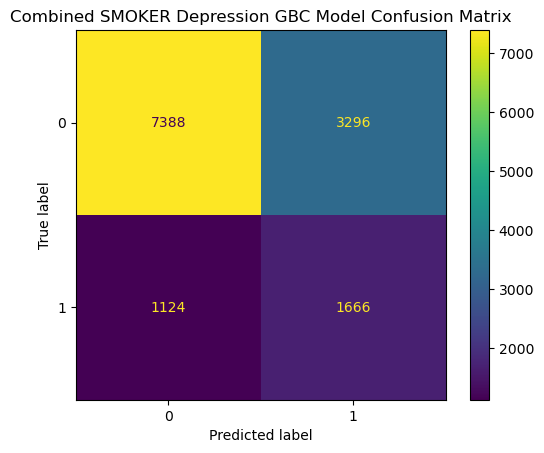

In [34]:
# Print a pretty confusion matrix

cm = confusion_matrix(y_test, y_pred, labels=gbc.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=gbc.classes_)

# Display the confusion matrix
disp.plot()
# Set the title of the plot
plt.title('Combined SMOKER Depression GBC Model Confusion Matrix')
plt.show()

In [17]:
# Create feature importance dataframe to analyze the importance of each feature
fi_values = gbc.feature_importances_
features = X_train.columns
# Create dataframe
feature_importance_df = pd.DataFrame({"feature": features, "feature_importance": fi_values})
# Sort in descending order
feature_importance_df = feature_importance_df.sort_values(by="feature_importance", ascending = False)
# View dataframe
feature_importance_df

,feature,feature_importance
1,HEALTH2,0.297134
0,CATAG3,0.289218
6,MRJFLAG,0.171519
7,PYUD5MRJ,0.067654
4,POVERTY3,0.041653
8,ALCFLAG,0.039906
2,ANYHLTI2,0.039703
14,SMOKER,0.022793
3,INCOME,0.014834
5,TOBFLAG,0.005945


In [24]:
# Find predicted probabilities for each class
predicted_probs = gbc.predict_proba(X_test)[:, 1]

# Print
predicted_probs

c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


array([0.82438756, 0.78780479, 0.72052131, ..., 0.72052131, 0.82438756,
       0.96793741])

In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = [.55, .6, .65, .7, .75, .80] 

for threshold in thresholds:
    predicted_labels = (predicted_probs > threshold).astype(int)
    conf_matrix = confusion_matrix(y_test, predicted_labels)
    
    tn, fp, fn, tp = conf_matrix.ravel()
    
    precision = precision_score(y_test, predicted_labels)
    recall = recall_score(y_test, predicted_labels)
    f1 = f1_score(y_test, predicted_labels)
    
    print(f"Threshold: {threshold:.2f} | Precision: {precision:.2f} | Recall: {recall:.2f} | F1-Score: {f1:.2f}")
    print(f"Confusion Matrix:")
    print(f"TN: {tn} | FP: {fp}")
    print(f"FN: {fn} | TP: {tp}")
    print()

Threshold: 0.55 | Precision: 0.21 | Recall: 0.98 | F1-Score: 0.35
Confusion Matrix:
TN: 350 | FP: 10334
FN: 43 | TP: 2747

Threshold: 0.60 | Precision: 0.21 | Recall: 0.98 | F1-Score: 0.35
Confusion Matrix:
TN: 394 | FP: 10290
FN: 56 | TP: 2734

Threshold: 0.65 | Precision: 0.21 | Recall: 0.98 | F1-Score: 0.35
Confusion Matrix:
TN: 394 | FP: 10290
FN: 56 | TP: 2734

Threshold: 0.70 | Precision: 0.21 | Recall: 0.94 | F1-Score: 0.34
Confusion Matrix:
TN: 751 | FP: 9933
FN: 168 | TP: 2622

Threshold: 0.75 | Precision: 0.23 | Recall: 0.73 | F1-Score: 0.35
Confusion Matrix:
TN: 3927 | FP: 6757
FN: 752 | TP: 2038

Threshold: 0.80 | Precision: 0.23 | Recall: 0.60 | F1-Score: 0.33
Confusion Matrix:
TN: 4983 | FP: 5701
FN: 1118 | TP: 1672



In [26]:
# Choose a different threshold based on the findings above

chosen_threshold = 0.75  # Replace with your chosen threshold
final_predictions = (predicted_probs > chosen_threshold).astype(int)

In [27]:
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, final_predictions)
print(conf_matrix)

[[3927 6757]
 [ 752 2038]]


In [28]:
# Print classification report based on final_predictions
print(classification_report(y_test, final_predictions))

              precision    recall  f1-score   support

           0       0.84      0.37      0.51     10684
           1       0.23      0.73      0.35      2790

    accuracy                           0.44     13474
   macro avg       0.54      0.55      0.43     13474
weighted avg       0.71      0.44      0.48     13474



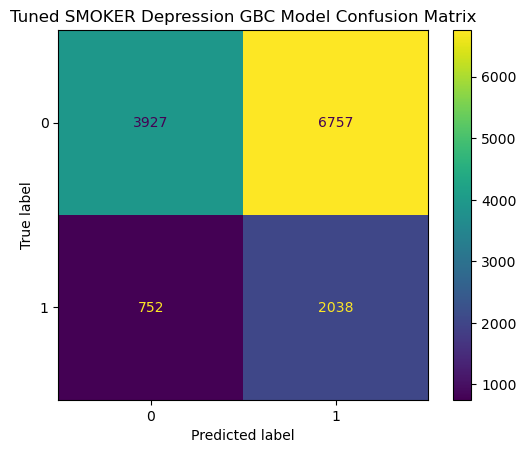

In [32]:
# Print a pretty confusion matrix

cm = confusion_matrix(y_test, final_predictions, labels=gbc.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=gbc.classes_)

# Display the confusion matrix
disp.plot()
# Set the title of the plot
plt.title('Tuned SMOKER Depression GBC Model Confusion Matrix')
plt.show()

In [31]:
y_test.value_counts()

0    10684
1     2790
Name: DEP, dtype: int64

In [33]:
# Create feature importance dataframe to analyze the importance of each feature
fi_values = gbc.feature_importances_
features = X_train.columns
# Create dataframe
feature_importance_df = pd.DataFrame({"feature": features, "feature_importance": fi_values})
# Sort in descending order
feature_importance_df = feature_importance_df.sort_values(by="feature_importance", ascending = False)
# View dataframe
feature_importance_df

,feature,feature_importance
1,HEALTH2,0.362204
0,CATAG3,0.266727
6,MRJFLAG,0.115889
7,PYUD5MRJ,0.080821
4,POVERTY3,0.056055
2,ANYHLTI2,0.040701
9,ALCFLAG,0.029343
8,MJYRTOT,0.027589
3,INCOME,0.011978
5,TOBFLAG,0.005321


## Section III: Confirming Validity of DEP against age-specific depression targets

### Before proceeding, use CATAG3 to create an ADULT dataframe and a YOUTH dataframe each with their appropriate target column

In [35]:
# Read in subset_three_targets.csv
df = pd.read_csv('data/subset_three_targets.csv')

In [36]:
# Use >= 100 as the cutoff value
cutoff = 100

# Create a new column called 'SMOKER' with the cutoff value
df['SMOKER'] = np.where(df['MJYRTOT'] >= cutoff, 1, 0)

# Drop MJYRTOT column
df = df.drop(columns=['MJYRTOT'])

In [37]:
# Create ADULT dataframe (CATAG3 == 2, 3, or 4)
ADULT = df[df['CATAG3'].isin([2,3,4])]

# Drop the YODSMMDE and DEP columns from ADULT dataframe
ADULT = ADULT.drop(['YODSMMDE', 'DEP'], axis=1)

# Create YOUTH dataframe (CATAG3 == 1)
YOUTH = df[df['CATAG3'].isin([1])]

# Drop the ADSMMDEA and DEP columns from YOUTH dataframe
YOUTH = YOUTH.drop(['ADSMMDEA', 'DEP'], axis=1)

In [38]:
# Inspect the value counts of the target variables for ADULT
adultVC = ADULT.ADSMMDEA.value_counts()

adultVC

0    25813
1     7364
Name: ADSMMDEA, dtype: int64

In [39]:
# Percent Adult's with Depression
percent_adults_depression = round(adultVC[1]/(adultVC[0]+adultVC[1]), 2)*100 # Round to 2 decimal places

# Print
print(f"Percent of Adults with Depression: {percent_adults_depression}%")

Percent of Adults with Depression: 22.0%


In [40]:
# Inspect the value counts of the target variables for YOUTH
youthVC = YOUTH.YODSMMDE.value_counts()

youthVC

0    7684
1    2557
Name: YODSMMDE, dtype: int64

In [41]:
# Percent YOUTH with Depression
percent_youth_depression = round(youthVC[1]/(youthVC[0]+youthVC[1]), 2)*100 # Round to 2 decimal places

# Print
print(f"Percent of Adults with Depression: {percent_youth_depression}%")

Percent of Adults with Depression: 25.0%


### Train and test a model on ADULT dataset

In [45]:
ADULT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33177 entries, 0 to 53895
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CATAG3      33177 non-null  int64  
 1   HEALTH2     33177 non-null  float64
 2   ANYHLTI2    33177 non-null  int64  
 3   INCOME      33177 non-null  int64  
 4   POVERTY3    33177 non-null  float64
 5   TOBFLAG     33177 non-null  int64  
 6   MRJFLAG     33177 non-null  int64  
 7   PYUD5MRJ    33177 non-null  float64
 8   ALCFLAG     33177 non-null  int64  
 9   COCFLAG     33177 non-null  int64  
 10  CRKFLAG     33177 non-null  int64  
 11  HERFLAG     33177 non-null  int64  
 12  LSDFLAG     33177 non-null  int64  
 13  METHAMFLAG  33177 non-null  int64  
 14  ADSMMDEA    33177 non-null  int64  
 15  SMOKER      33177 non-null  int32  
dtypes: float64(3), int32(1), int64(12)
memory usage: 4.2 MB


In [46]:
# Instantiate a Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)

# Define X and y
X = ADULT.drop('ADSMMDEA', axis=1)
y = ADULT['ADSMMDEA']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing sets
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled) # Here the resampled X_train data is scaled
X_test_scaled = scaler.transform(X_test) # Here the original X_test data is scaled as it was not resampled

# Note: you do not need to scale the target variable (y). 

# Fit the model to the oversampled training data
gbc.fit(X_train_resampled_scaled, y_train_resampled)

# Predict on the test data
y_pred = gbc.predict(X_test_scaled)

# Return a classification report for the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.64      0.73      6423
           1       0.33      0.61      0.43      1872

    accuracy                           0.63      8295
   macro avg       0.59      0.62      0.58      8295
weighted avg       0.73      0.63      0.66      8295



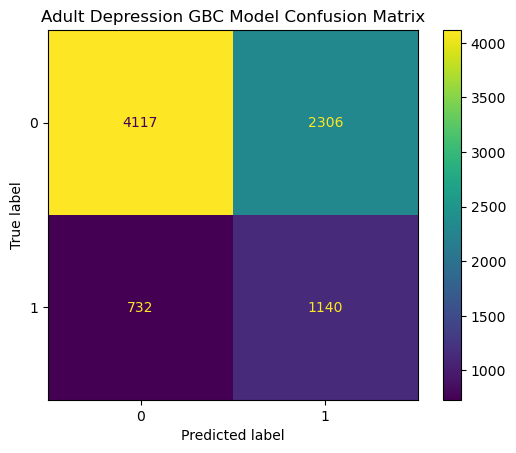

In [47]:
# Make a confusion matrix using Sklearn

cm = confusion_matrix(y_test, y_pred, labels=gbc.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=gbc.classes_)

# Display the confusion matrix
disp.plot()
# Set the title of the plot
plt.title('Adult Depression GBC Model Confusion Matrix')
plt.show()

In [44]:
# Create feature importance dataframe to analyze the importance of each feature
fi_values = gbc.feature_importances_
features = X_train.columns
# Create dataframe
adult_feature_importance_df = pd.DataFrame({"feature": features, "adult_feature_importance": fi_values})
# Sort in descending order
adult_feature_importance_df = adult_feature_importance_df.sort_values(by="adult_feature_importance", ascending = False)
# View dataframe
adult_feature_importance_df

,feature,adult_feature_importance
1,HEALTH2,0.348548
6,MRJFLAG,0.231310
0,CATAG3,0.098906
7,PYUD5MRJ,0.070226
2,ANYHLTI2,0.063862
4,POVERTY3,0.061446
14,SMOKER,0.033817
3,INCOME,0.031256
8,ALCFLAG,0.027110
5,TOBFLAG,0.012752


In [48]:
# Top 9 Features 

# Select first 9 features from adult_feature_importance_df
Top9_adult = adult_feature_importance_df['feature'][:9]

# Convert into list
Top9_adult = Top9_adult.tolist()

# Inspect
Top9_adult

['HEALTH2',
 'MRJFLAG',
 'CATAG3',
 'PYUD5MRJ',
 'ANYHLTI2',
 'POVERTY3',
 'SMOKER',
 'INCOME',
 'ALCFLAG']

### Rerun model with only the top 9 ADULT features


In [49]:
# Retrain and test model using Top9_adult as X

# Instantiate a Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)

# Define X and y
X = ADULT[['HEALTH2',
 'MRJFLAG',
 'CATAG3',
 'PYUD5MRJ',
 'ANYHLTI2',
 'POVERTY3',
 'SMOKER',
 'INCOME',
 'ALCFLAG']]
y = ADULT['ADSMMDEA']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing sets
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled) # Here the resampled X_train data is scaled
X_test_scaled = scaler.transform(X_test) # Here the original X_test data is scaled as it was not resampled

# Note: you do not need to scale the target variable (y). 

# Fit the model to the oversampled training data
gbc.fit(X_train_resampled_scaled, y_train_resampled)

# Predict on the test data
y_pred = gbc.predict(X_test_scaled)

# Return a classification report for the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.65      0.74      6423
           1       0.34      0.61      0.44      1872

    accuracy                           0.64      8295
   macro avg       0.59      0.63      0.59      8295
weighted avg       0.74      0.64      0.67      8295



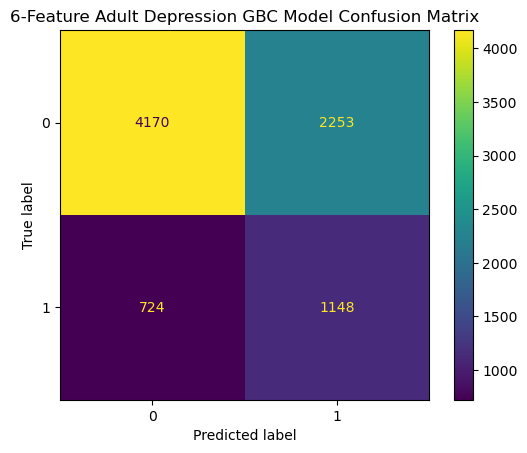

In [51]:
# Print a pretty confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=gbc.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=gbc.classes_)

# Display the confusion matrix
disp.plot()
# Set the title of the plot
plt.title('6-Feature Adult Depression GBC Model Confusion Matrix')
plt.show()

### Train Model with YOUTH data

In [52]:
# Instantiate a Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)

# Define X and y
X = YOUTH.drop('YODSMMDE', axis=1)
y = YOUTH['YODSMMDE']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing sets
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled) # Here the resampled X_train data is scaled
X_test_scaled = scaler.transform(X_test) # Here the original X_test data is scaled as it was not resampled

# Note: you do not need to scale the target variable (y).

# Fit the model to the oversampled training data
gbc.fit(X_train_resampled_scaled, y_train_resampled)

# Predict on the test data
y_pred = gbc.predict(X_test_scaled)

# Return a classification report for the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.69      0.75      1937
           1       0.37      0.58      0.45       624

    accuracy                           0.66      2561
   macro avg       0.60      0.63      0.60      2561
weighted avg       0.72      0.66      0.68      2561



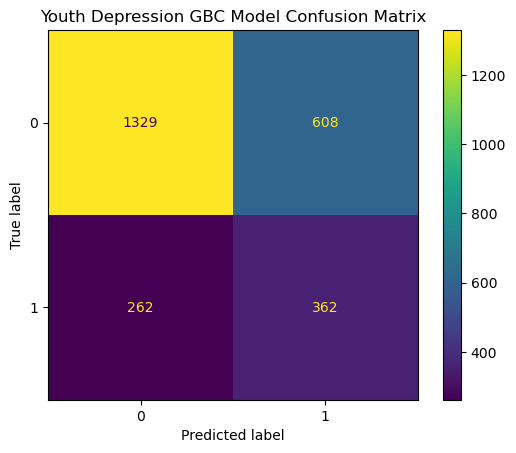

In [53]:
# Print a confusion matrix for the model
cm = confusion_matrix(y_test, y_pred, labels=gbc.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=gbc.classes_)

# Display the confusion matrix
disp.plot()
# Set the title of the plot
plt.title('Youth Depression GBC Model Confusion Matrix')
plt.show()

In [54]:
# Create feature importance dataframe to analyze the importance of each feature
fi_values = gbc.feature_importances_
features = X_train.columns
# Create dataframe
youth_feature_importance_df = pd.DataFrame({"feature": features, "youth_feature_importance": fi_values})
# Sort in descending order
youth_feature_importance_df = youth_feature_importance_df.sort_values(by="youth_feature_importance", ascending = False)
# View dataframe
youth_feature_importance_df

,feature,youth_feature_importance
1,HEALTH2,0.422686
8,ALCFLAG,0.344644
6,MRJFLAG,0.059757
7,PYUD5MRJ,0.035597
3,INCOME,0.034321
4,POVERTY3,0.029852
5,TOBFLAG,0.028986
2,ANYHLTI2,0.026817
9,COCFLAG,0.006703
14,SMOKER,0.003315


In [56]:
# Select the top 6 features from the YOUTH model

# Select first 9 features from adult_feature_importance_df
Top6_youth = youth_feature_importance_df['feature'][:6]

# Convert into list
Top6_youth = Top6_youth.tolist()

# Inspect
Top6_youth

['HEALTH2', 'ALCFLAG', 'MRJFLAG', 'PYUD5MRJ', 'INCOME', 'POVERTY3']

### Note: Communicate these findings to the group and use them to inform Pycaret model feature selection.

In [57]:
# Merge the two feature importance dataframes (adult_feature_importance_df and youth_feature_importance_df) on ['feature']

FEATURE_IMPORTANCES = pd.merge(feature_importance_df, adult_feature_importance_df, on=['feature'], how='outer')

# Merge FEATURE_IMPORTANCES with youth_feature_importance_df on ['feature']
FEATURE_IMPORTANCES = pd.merge(FEATURE_IMPORTANCES, youth_feature_importance_df, on=['feature'], how='outer')

# Inspect

FEATURE_IMPORTANCES

,feature,feature_importance,adult_feature_importance,youth_feature_importance
0,HEALTH2,0.297134,0.348548,0.422686
1,CATAG3,0.289218,0.098906,0.000000
2,MRJFLAG,0.171519,0.231310,0.059757
3,PYUD5MRJ,0.067654,0.070226,0.035597
4,POVERTY3,0.041653,0.061446,0.029852
5,ALCFLAG,0.039906,0.027110,0.344644
6,ANYHLTI2,0.039703,0.063862,0.026817
7,SMOKER,0.022793,0.033817,0.003315
8,INCOME,0.014834,0.031256,0.034321
9,TOBFLAG,0.005945,0.012752,0.028986


C:\Users\e.a.wright\AppData\Local\Temp\ipykernel_35804\2327115218.py:2: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  melted_data = pd.melt(FEATURE_IMPORTANCES, id_vars='feature', var_name='iteration', value_name='feature_importance')


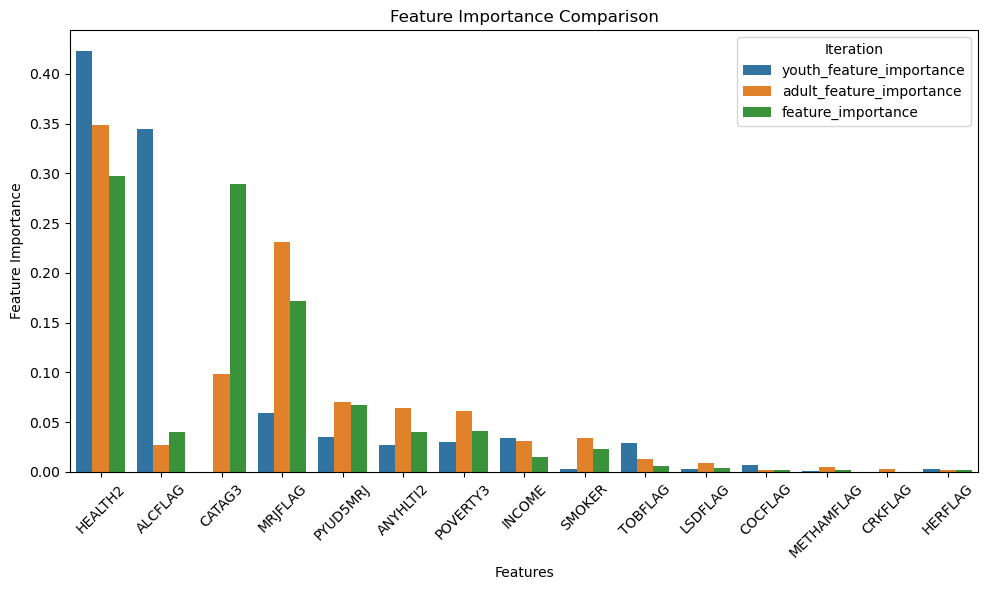

In [58]:
# Melting the data to create a single importance column for both iterations
melted_data = pd.melt(FEATURE_IMPORTANCES, id_vars='feature', var_name='iteration', value_name='feature_importance')

# Sorting data by feature importance for better visualization
melted_data = melted_data.sort_values(by='feature_importance', ascending=False)

# Create a bar plot using Seaborn with bars side by side
plt.figure(figsize=(10, 6))
sns.barplot(x='feature', y='feature_importance', hue='iteration', data=melted_data)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance Comparison')
plt.xticks(rotation=45)
plt.legend(title='Iteration')
plt.tight_layout()
plt.show()

In [6]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Ensembled sampling
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import RUSBoostClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import BalancedBaggingClassifier

In [13]:
subset = subset.dropna()

In [14]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53896 entries, 0 to 53911
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CATAG3      53896 non-null  int64  
 1   HEALTH2     53896 non-null  float64
 2   ANYHLTI2    53896 non-null  int64  
 3   INCOME      53896 non-null  int64  
 4   POVERTY3    53896 non-null  float64
 5   TOBFLAG     53896 non-null  int64  
 6   MRJFLAG     53896 non-null  int64  
 7   PYUD5MRJ    53896 non-null  float64
 8   MJYRTOT     53896 non-null  int64  
 9   ALCFLAG     53896 non-null  int64  
 10  COCFLAG     53896 non-null  int64  
 11  CRKFLAG     53896 non-null  int64  
 12  HERFLAG     53896 non-null  int64  
 13  LSDFLAG     53896 non-null  int64  
 14  METHAMFLAG  53896 non-null  int64  
 15  ADDPREV     53896 non-null  int64  
 16  ADSMMDEA    53896 non-null  int64  
 17  YODSMMDE    53896 non-null  int64  
 18  DEP         53896 non-null  int64  
dtypes: float64(3), int64(16)
